In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import numpy as np
import pygritbx

In [2]:
# Unit vecotrs for reference frame
i = np.array([1, 0, 0])
j = np.array([0, 1, 0])
k = np.array([0, 0, 1])
referenceFrame = np.array([i, j, k])

In [3]:
# Axial dimensions
a = 79 # [mm]
b = 70.5 # [mm]
c = 59.25 # [mm]
# From technical drawing anf bearing's width
offset = 46 - 16 # [mm]

In [4]:
# Input motor
input_motor = pygritbx.Motor(name="Input Motor", loc=0, power=31.5*1e3, n=1500, axis=k)

In [5]:
# Material
gear_material = pygritbx.Material("Steel", sigma_u=1060, sigma_y=930, sigma_Dm1=0, HB=700)
A2_material = pygritbx.Material("16MnCr5", sigma_u=1060, sigma_y=930, sigma_Dm1=700, HB=0)

In [6]:
# Gears
# G1
G1 = pygritbx.Gear(name="G1", axis=k, loc=a+b, m_n=3, z=16, psi=-15, phi_n=20, Q_v=8, FW=45, material=gear_material)
# G2
G2 = pygritbx.Gear(name="G2", axis=k, loc=a+b+offset, m_n=3, z=48, psi=15, phi_n=20, Q_v=8, FW=45, material=gear_material)
# G3
G3 = pygritbx.Gear(name="G3", axis=k, loc=a+offset, m_n=4, z=21, psi=-15, phi_n=20, Q_v=8, FW=56, material=gear_material)
# G4
G4 = pygritbx.Gear(name="G4", axis=k, loc=a, m_n=4, z=63, psi=15, phi_n=20, Q_v=8, FW=56, material=gear_material) 

In [7]:
# Supports
# A
A = pygritbx.Support(name="A", type="Roller", bearingType="Cylindrical", catalogueName="NU 206 ECP", 
                     catalogueType="Explorer", d=30, D=62, B=16, C=44*1e3, C0=36.5*1e3, Pu=4.5*1e3, nr=13*1e3,
                     a=8, e=0.3, Y=0.4, Y1=0,kr=0.15, shoulder=1, arr="Single", axis=k, loc=0)
# B
B = pygritbx.Support(name="B", type="Pin", bearingType="Tapered", catalogueName="30206 DF", 
                     catalogueType="Explorer", d=30, D=62, B=34.5, C=85.7*1e3, C0=88*1e3, Pu=9.65*1e3, nr=7500,
                     a=17.25, e=0.37, Y0=1.8, Y1=1.8, Y2=2.7, shoulder=-1, arr="F2F", axis=k, loc=a+b+c)
# C
C = pygritbx.Support(name="C", type="Roller", bearingType="Cylindrical", catalogueName="NU 209 ECP", 
                     catalogueType="Explorer", d=45, D=85, B=19, C=69.5*1e3, C0=64*1e3, Pu=8.15*1e3, nr=9*1e3,
                     a=9.5, e=0.3, Y=0.4, kr=0.15, shoulder=1, arr="Single", axis=k, loc=offset)
# D
D = pygritbx.Support(name="D", type="Pin", bearingType="Tapered", catalogueName="32011 X/DF", 
                     catalogueType="Explorer", d=55, D=90, B=46, C=170*1e3, C0=232*1e3, Pu=26*1e3, nr=4500,
                     a=23, e=0.4, Y0=1.6, Y1=1.7, Y2=2.5, arr="F2F", axis=k, loc=a+b+c+offset)
# E
E = pygritbx.Support(name="E", type="Roller", bearingType="Cylindrical", catalogueName="NU 2210 ECP", 
                     catalogueType="Explorer", d=50, D=90, B=23, C=90*1e3, C0=88*1e3, Pu=11.4*1e3, nr=8500,
                     a=11.5, e=0.3, Y=0.4, kr=0.2, shoulder=1, arr="Single", axis=k, loc=0)
# F
F = pygritbx.Support(name="F", type="Pin", bearingType="Tapered", catalogueName="32011 X/DF", 
                     catalogueType="Explorer", d=55, D=90, B=46, C=170*1e3, C0=232*1e3, Pu=26*1e3, nr=4500,
                     a=23, e=0.4, Y0=1.6, Y1=1.7, Y2=2.5, arr="F2F", axis=k, loc=a+b+c)

In [8]:
# Output Component
output = pygritbx.Component(name="Output", material=None, axis=k, loc=a+b+c+80)

In [9]:
# Gearbox Configuration
# Shaft A1
A1 = pygritbx.Shaft(name="A1", inputs=[input_motor], outputs=[G1], axis=k, material=None, sups=np.array([A, B]), loc=[0, 0, 0])
# Mesh M1
M1 = pygritbx.GearMesh(name="M1", drivingGear=G1, drivenGear=G2, radiality=[i], type="External")
# Shaft A2
A2 = pygritbx.Shaft(name="A2", inputs=[G2], outputs=[G3], axis=k, material=A2_material, sups=np.array([C, D]))
# Mesh M2
M2 = pygritbx.GearMesh(name="M2", drivingGear=G3, drivenGear=G4, radiality=[i], type="External")
# Shaft A3
A3 = pygritbx.Shaft(name="A3", inputs=[G4], outputs=[output], axis=k, material=None, sups=np.array([E, F]))

In [10]:
# Shaft A1
A1.solve()

Checking torque equilibrium for A1.
A1 does not mainatain a torque equilibrium.
Checking solvability for A1.
Solving torque equilibrium for A1.
Torque equilibrium for A1 is solved.


Checking torque equilibrium for G1.
G1 does not mainatain a torque equilibrium.
Checking solvability for G1.
Solving forces on G1 due to mesh M1.
Checking torque equilibrium for G1.
G1 mainatains a torque equilibrium.
Checking force equilibrium on A1.
A1 does not maintain a force equilibrium.
Checking force equilibrium on A1.
A1 maintains a force equilibrium.


In [11]:
# Gear G1
G1.solve()

Checking torque equilibrium for G1.
G1 mainatains a torque equilibrium.
Nothing to be solved for G1.


In [12]:
# Gear G2
G2.solve()

Checking torque equilibrium for G2.
Checking solvability for G2.
Solving torque equilibrium for G2.
Checking torque equilibrium for G2.
G2 mainatains a torque equilibrium.


In [13]:
# Shaft A2
A2.solve()

Checking torque equilibrium for A2.
A2 does not mainatain a torque equilibrium.
Checking solvability for A2.
Solving torque equilibrium for A2.
Torque equilibrium for A2 is solved.
Checking torque equilibrium for G3.
G3 does not mainatain a torque equilibrium.
Checking solvability for G3.
Solving forces on G3 due to mesh M2.
Checking torque equilibrium for G3.
G3 mainatains a torque equilibrium.
Checking force equilibrium on A2.
A2 does not maintain a force equilibrium.
Checking force equilibrium on A2.
A2 maintains a force equilibrium.


In [14]:
# Gear G3
G3.solve()

Checking torque equilibrium for G3.
G3 mainatains a torque equilibrium.
Nothing to be solved for G3.


In [15]:
# Gear G4
G4.solve()

Checking torque equilibrium for G4.
Checking solvability for G4.
Solving torque equilibrium for G4.
Checking torque equilibrium for G4.
G4 mainatains a torque equilibrium.


In [16]:
G4.ETs[0].torque

array([   0.        ,    0.        , 1804.81705466])

In [17]:
# Update output force
Fout_r = np.abs(np.sum(G4.ETs[0].torque)) / 0.25 * i
Fout_a = 0.25 * np.abs(np.sum(Fout_r)) * (k)
Fout = pygritbx.Force(Fout_a + Fout_r, output.abs_loc)
A3.outputs[0].updateEFs([Fout])

In [18]:
# Shaft A3
A3.solve()

Checking torque equilibrium for A3.
A3 does not mainatain a torque equilibrium.
Checking solvability for A3.
Solving torque equilibrium for A3.
Torque equilibrium for A3 is solved.
Checking force equilibrium on A3.
A3 does not maintain a force equilibrium.
Checking force equilibrium on A3.
A3 maintains a force equilibrium.


In [19]:
# Reaction on A1
A.F_tot.force, B.F_tot.force

(array([1120.59633936, 2290.78897174,    0.        ]),
 array([1920.60591153, 5780.13419874, 2162.59734571]))

In [20]:
# Reaction on A2
C.F_tot.force, D.F_tot.force

(array([  3921.71762195, -10890.56818574,      0.        ]),
 array([ -1749.43029988, -11016.22327701,   1544.71238979]))

In [21]:
# Reaction on A3
E.F_tot.force, F.F_tot.force

(array([1842.8285398 , 8599.77921399,    0.        ]),
 array([-14275.58633141,   5236.08907827,  -5512.12679016]))

In [22]:
# Shaft A2 Profile
shaftProfile = pygritbx.ShaftProfile(name="prof",
                                     radii=np.array([42.5, 45, 45, 42.5, 42.5, 45, 45, 52, 52, G3.d_f, G3.d_f, 62, 62, 56, 56, 55, 55, 50, 50])/2, 
                                     locs=np.array([0, 1, 5.9, 6, 7.84, 7.85, 45.9, 46, 80.9, 81, 136.9, 137, 156.9, 157, 204.9, 205, 267.9, 268, 288]))
shaftProfile.addFillet(radius=1.5, quadrant=[1, 2], zOff=44.5, dOff=22.5)
shaftProfile.addFillet(radius=5, quadrant=[2], zOff=76, dOff=31)
shaftProfile.addFillet(radius=2, quadrant=[1], zOff=139, dOff=33)
shaftProfile.addFillet(radius=1, quadrant=[1], zOff=158, dOff=29)
shaftProfile.addFillet(radius=1.5, quadrant=[1, 2], zOff=206.5, dOff=27.5)
refinedProfile = shaftProfile.refineProfile(delta=0.1)
A2.addProfile(profile=refinedProfile)
#A2.profile.CalculateSectionProperties()

In [23]:
# Shaft A2 Sections
# Section V1
v1 = pygritbx.ShaftSection(name="V1", loc=a+offset, d=G3.d_f, Ra=1.6, material=A2.material)
v1.appendKf(Kf=np.array([1.2, 1.5]), loadType=np.array(["Bending", "Torsion"]))
# Section V2
v2 = pygritbx.ShaftSection(name="V2", loc=a+G3.FW/2+4+offset, d=62, Ra=1.6, material=A2.material)
v2.addNotchSensitivity(notchRadius=2, sigma_u=A2.material.sigma_u)
v2.addGeometricStressRaiser(r2d=2/62, D2d=G3.d_f/62)
# Section V3
v3 = pygritbx.ShaftSection(name="V3", loc=a+b-G2.FW/2+3+offset, d=62, Ra=1.6, material=A2.material)
v3.addNotchSensitivity(notchRadius=1, sigma_u=A2.material.sigma_u)
v3.addGeometricStressRaiser(r2d=1/56, D2d=62/56)
# Section V4
v4 = pygritbx.ShaftSection(name="V4", loc=a+b-0.1+offset, d=56, Ra=1.6, material=A2.material)
v4.appendKf(Kf=np.array([1.6, 1.2]), loadType=np.array(["Bending", "Torsion"]))
# Add to shaft
userSections = np.array([v1, v2, v3, v4])
A2.addSections(sections=userSections)

Initiating static verification on shaft A2.
Calculating internal loads on shaft A2.


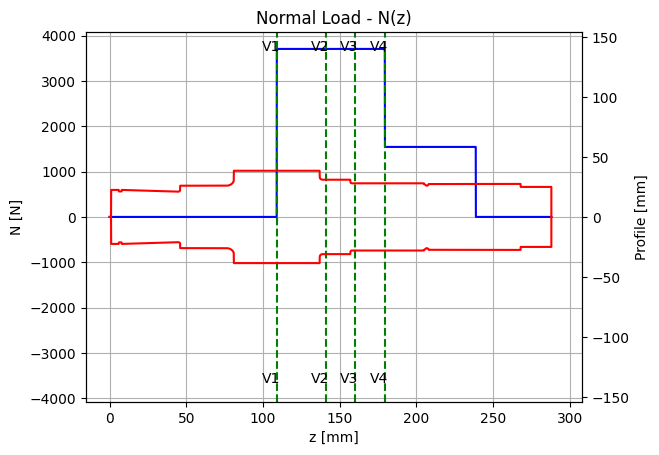

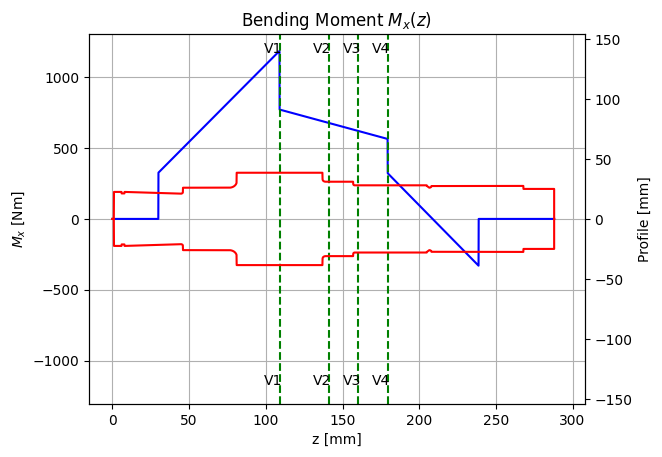

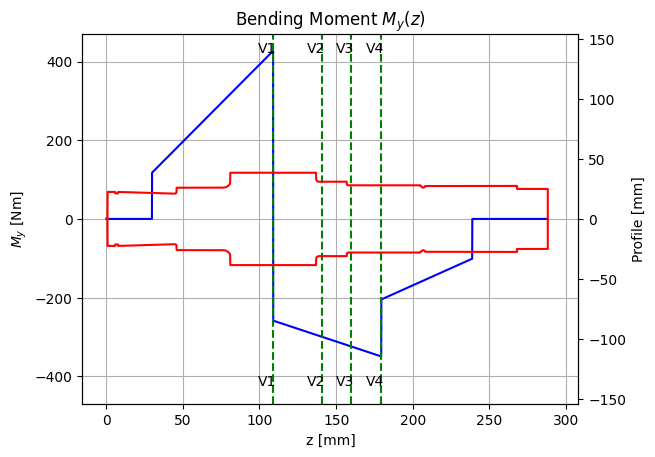

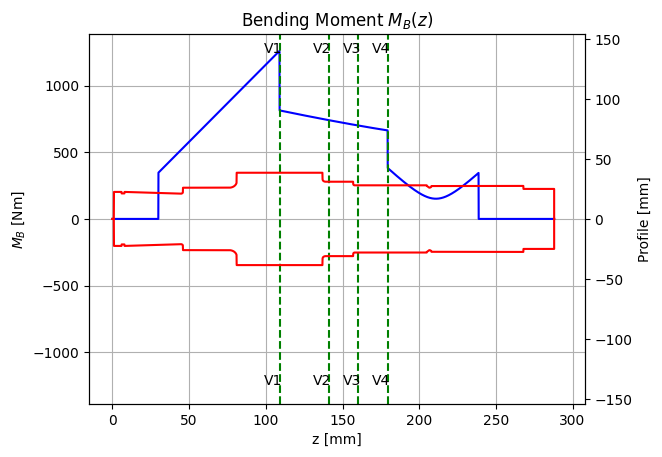

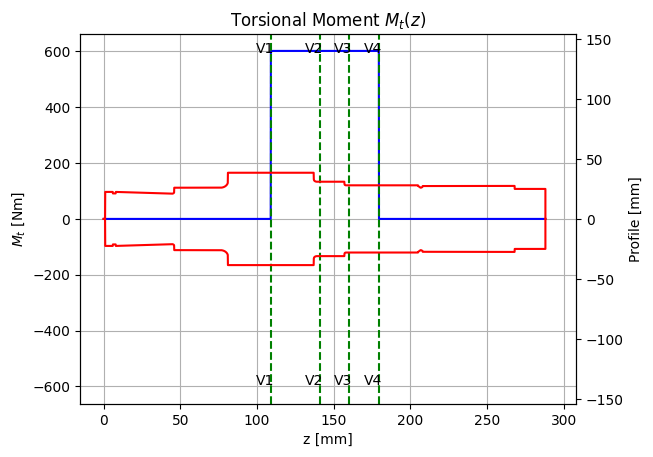

Calculating stresses on shaft A2 along profile 'prof'.


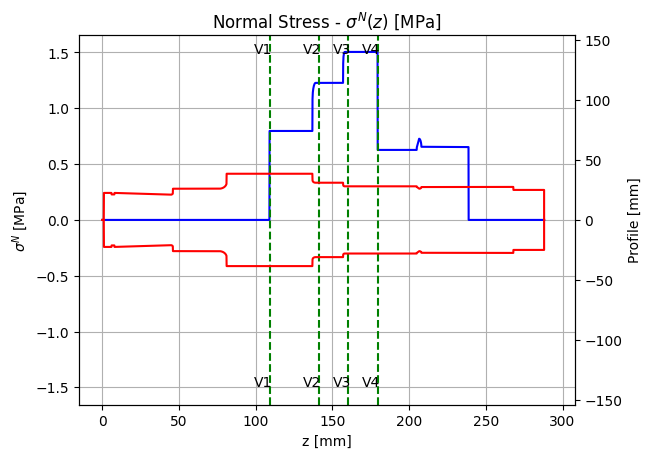

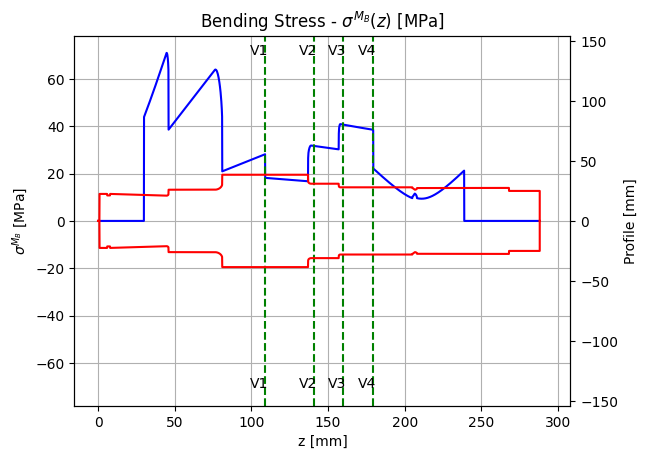

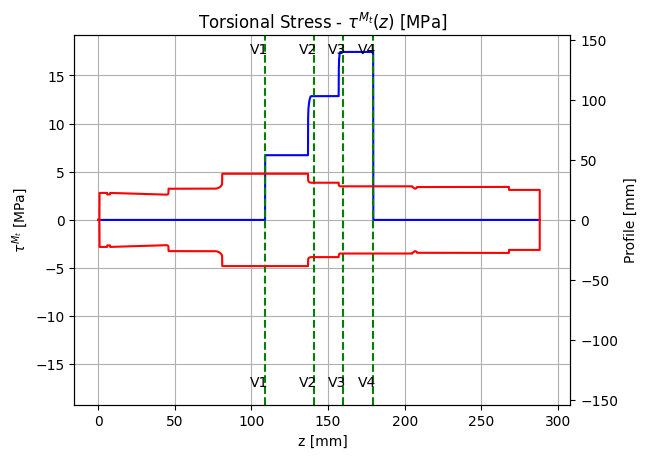

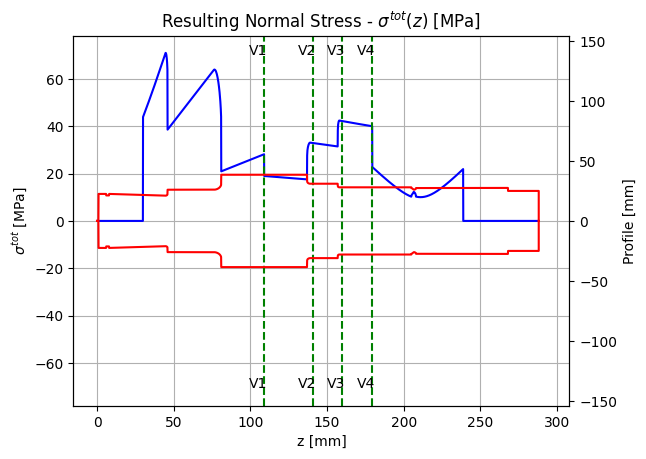

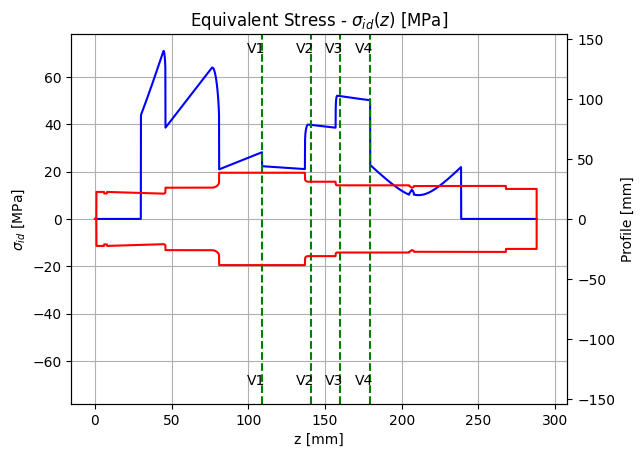

Calculating static safety factor for every user-defined section.
Section Name: Static Safety Factor
Section V1: 41.76 [-].
Section V2: 23.42 [-].
Section V3: 17.93 [-].
Section V4: 18.55 [-].


In [24]:
# Perform static verification on shaft A2
A2.performStaticVerification(RF=referenceFrame)

Initiating fatigue verification on shaft A2.
Internal loads for shaft A2 already calculated.


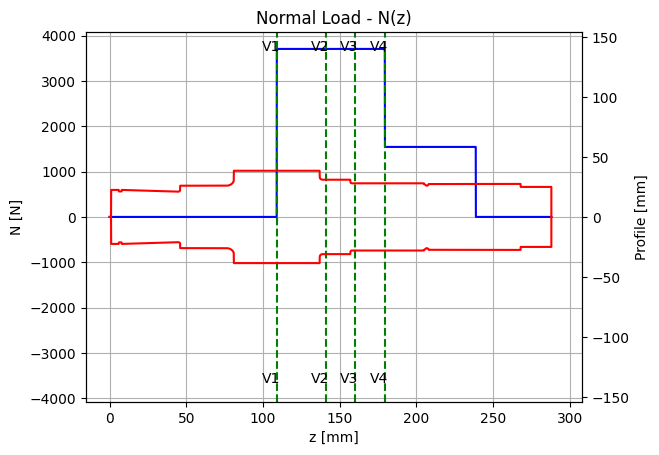

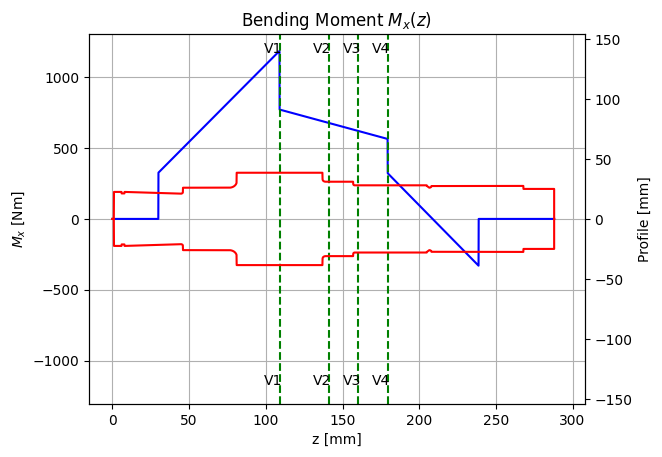

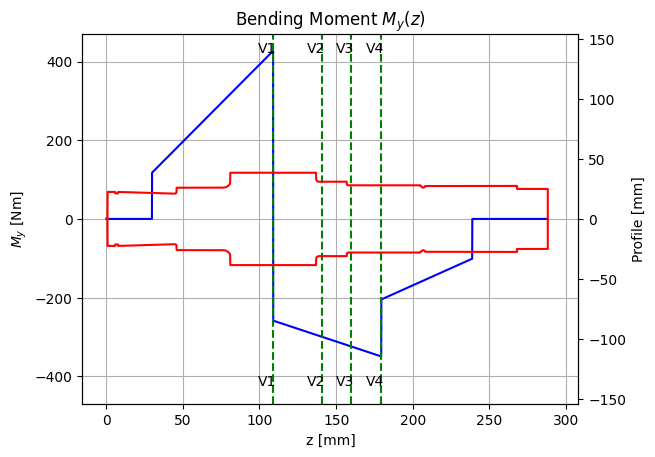

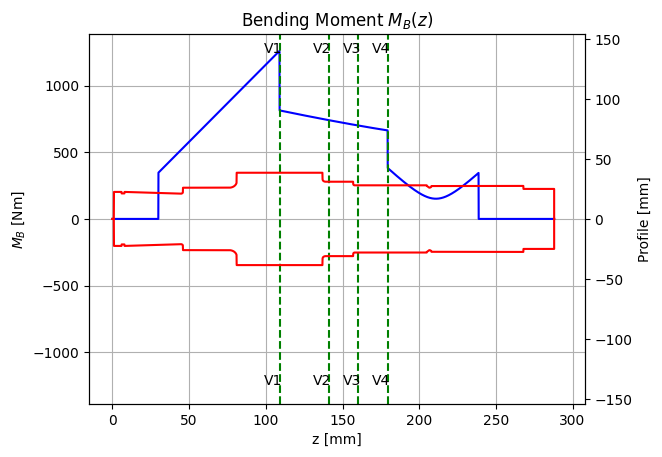

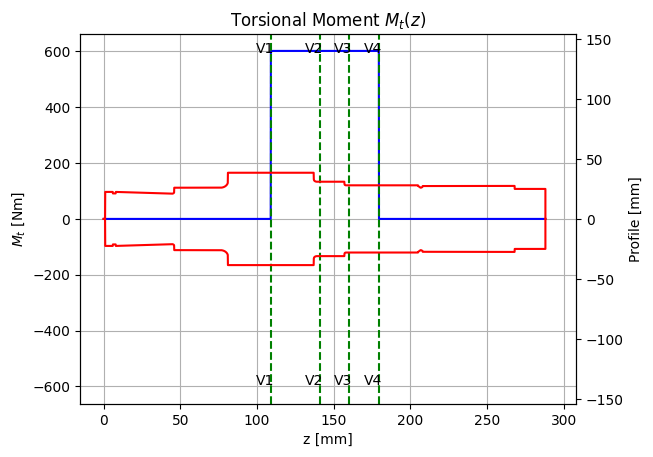

Calculating stresses on shaft A2 along profile 'prof'.


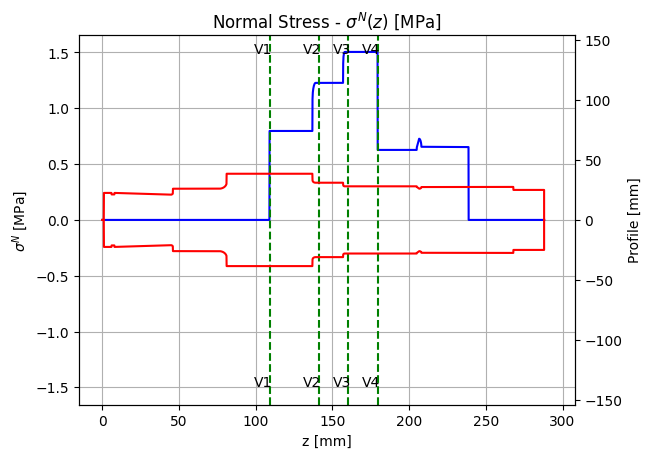

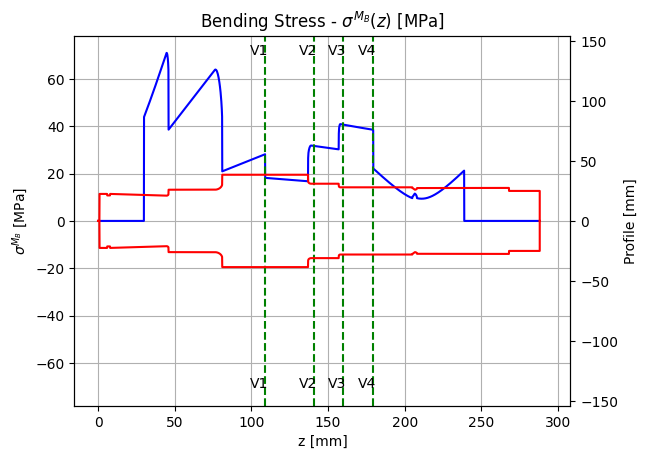

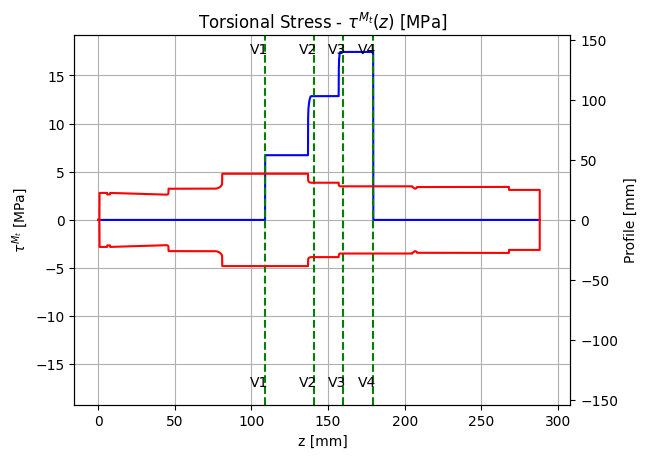

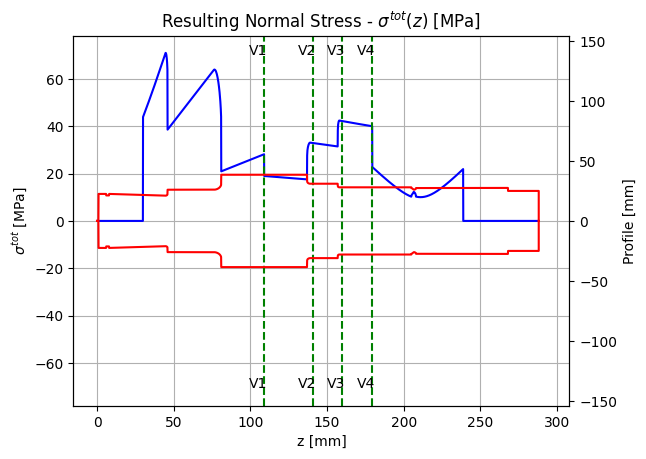

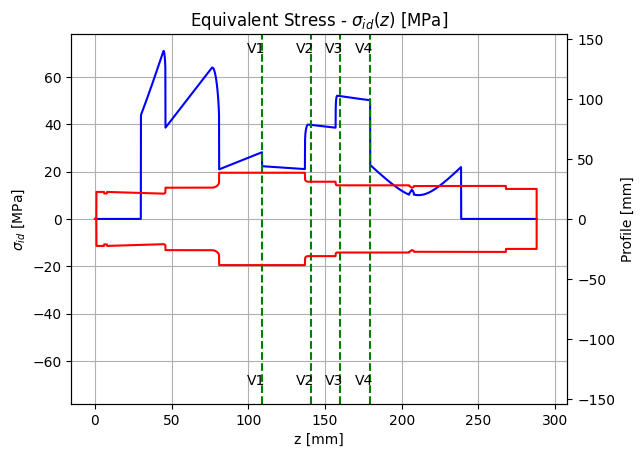

Calculating mean and alternating stresses for every user-defined section.
Calculating fatigue limit corrector factors on every user-defined section.
Calculating equivalent mean and alternating stresses along every user-defined section.


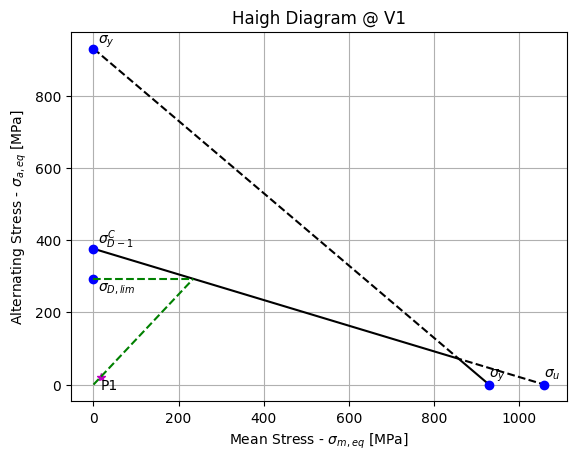

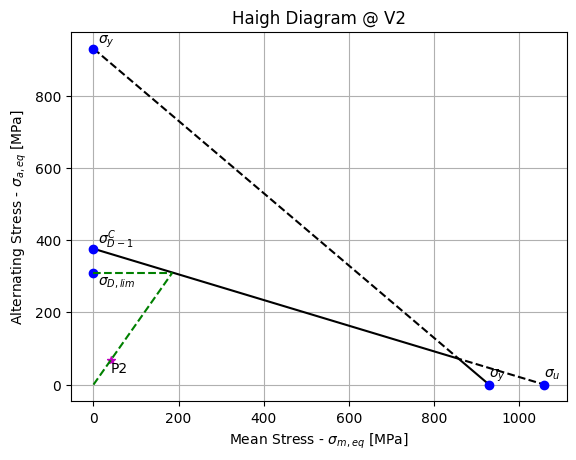

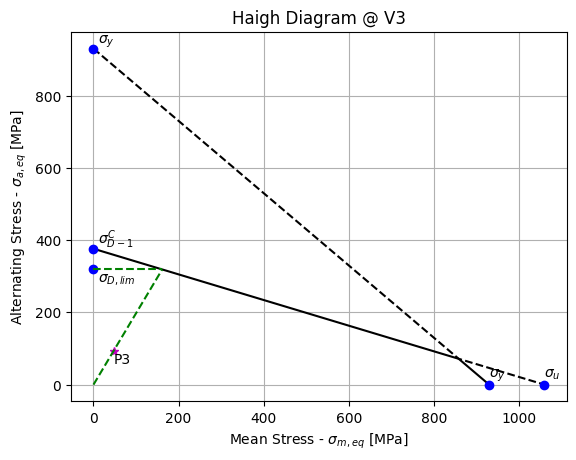

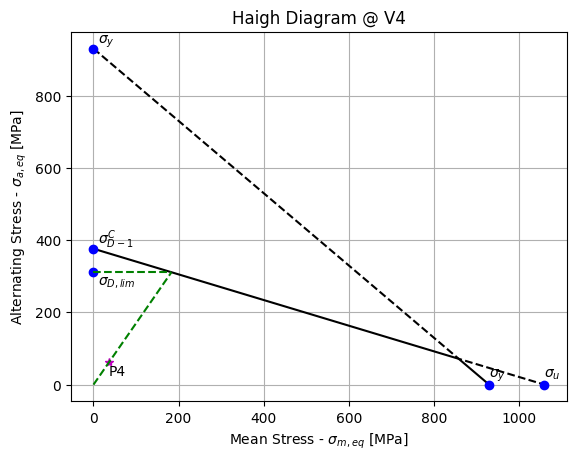

Calculating fatigue safety factor for every user-defined section.
Section Name: Fatigue Safety Factor
V1: 13.42 [-].
V2: 4.61 [-].
V3: 3.42 [-].
V4: 5.05 [-].


In [25]:
# Perform fatigue verification on shaft A2
A2.performFatigueVerification(RF=referenceFrame)

In [26]:
G3.analyseGearToothBending(mesh=M2, powerSource="Uniform", drivenMachine="Uniform", dShaft=52, Ce=1,
                           teethCond="uncrowned teeth", lShaft=a+b+c, useCond="Commercial, enclosed units", sigma_FP=860, b_YN=1.3558,
                           e_YN=-0.0178, N=1e8, temp=60, rel=0.99)

Initiating gear tooth bending analysis for gear G3.
Calculating maximum gear tooth bending stress for fatigue.
Maximum gear tooth bending stress for fatigue for gear G3: 207.96 [MPa].
Calculating bending safety factor for gear G3.
Gear tooth bending safety factor for gear G3: 4.04 [-].


In [27]:
G3.analyseGearToothPitting(mesh=M2, Z_R=1, sigma_HP=1470, b_ZN=1.4488, e_ZN=-0.023, N=1e8)

Initiating gear tooth pitting analysis for gear G3.
Calculating maximum gear contact stress.
Maximum gear contact stress for gear G3: 630.40 [MPa].
Calculating wear safety fator for gear G3.
Wear safety factor for gear G3: 2.21 [-].


In [28]:
A.performLifeAnalysis(rel=90, condition="Normal cleanliness", a_skf=8)

Initiating Life Analysis on bearing A.
Checking minimum load condition.
Bearing A satisfies minimium load condition.
Calculating static safety factor.
Bearing A's equivalent static load: 2550.19 [N].
Bearing A's static safety factor: 14.31 [-].
Calculating reliability factor.
Bearing A's reliability factor: 1.00 [-].
Calculating equivalent dynamic load.
Bearing A's equivalent dynamic load: 2550.19 [N].
Calculating contamination factor based on given condition: 'Normal cleanliness'.
Bearing A's contamination factor: 0.55 [-].
Calculating bearing life.
Bearing A life analysis results: 106175.88 [million cycles] | 1179732.00 [hours].


In [29]:
B.performLifeAnalysis(rel=90, condition="Normal cleanliness", a_skf=3.2)

Initiating Life Analysis on bearing B.
Checking minimum load condition.
Bearing B satisfies minimium load condition.
Calculating static safety factor.
Bearing B's equivalent static load: 7518.30 [N].
Bearing B's static safety factor: 11.70 [-].
Calculating reliability factor.
Bearing B's reliability factor: 1.00 [-].
Calculating equivalent dynamic load.
Bearing B's equivalent dynamic load: 8268.18 [N].
Calculating contamination factor based on given condition: 'Normal cleanliness'.
Bearing B's contamination factor: 0.55 [-].
Calculating bearing life.
Bearing B life analysis results: 7769.38 [million cycles] | 86326.46 [hours].


In [30]:
C.performLifeAnalysis(rel=90, condition="Normal cleanliness", a_skf=4.7)

Initiating Life Analysis on bearing C.
Checking minimum load condition.
Bearing C satisfies minimium load condition.
Calculating static safety factor.
Bearing C's equivalent static load: 11575.16 [N].
Bearing C's static safety factor: 5.53 [-].
Calculating reliability factor.
Bearing C's reliability factor: 1.00 [-].
Calculating equivalent dynamic load.
Bearing C's equivalent dynamic load: 11575.16 [N].
Calculating contamination factor based on given condition: 'Normal cleanliness'.
Bearing C's contamination factor: 0.55 [-].
Calculating bearing life.
Bearing C life analysis results: 1849.09 [million cycles] | 61636.20 [hours].


In [31]:
D.performLifeAnalysis(rel=90, condition="Normal cleanliness", a_skf=6.4)

Initiating Life Analysis on bearing D.
Checking minimum load condition.
Bearing D satisfies minimium load condition.
Calculating static safety factor.
Bearing D's equivalent static load: 15457.24 [N].
Bearing D's static safety factor: 15.01 [-].
Calculating reliability factor.
Bearing D's reliability factor: 1.00 [-].
Calculating equivalent dynamic load.
Bearing D's equivalent dynamic load: 15611.71 [N].
Calculating contamination factor based on given condition: 'Normal cleanliness'.
Bearing D's contamination factor: 0.55 [-].
Calculating bearing life.
Bearing D life analysis results: 18316.44 [million cycles] | 610548.03 [hours].


In [32]:
E.performLifeAnalysis(rel=90, condition="Normal cleanliness", a_skf=4.01)

Initiating Life Analysis on bearing E.
Checking minimum load condition.
Bearing E satisfies minimium load condition.
Calculating static safety factor.
Bearing E's equivalent static load: 8795.01 [N].
Bearing E's static safety factor: 10.01 [-].
Calculating reliability factor.
Bearing E's reliability factor: 1.00 [-].
Calculating equivalent dynamic load.
Bearing E's equivalent dynamic load: 8795.01 [N].
Calculating contamination factor based on given condition: 'Normal cleanliness'.
Bearing E's contamination factor: 0.55 [-].
Calculating bearing life.
Bearing E life analysis results: 9328.92 [million cycles] | 932892.15 [hours].


In [33]:
F.performLifeAnalysis(rel=90, condition="Normal cleanliness", a_skf=1.93)

Initiating Life Analysis on bearing F.
Checking minimum load condition.
Bearing F satisfies minimium load condition.
Calculating static safety factor.
Bearing F's equivalent static load: 31472.53 [N].
Bearing F's static safety factor: 7.37 [-].
Calculating reliability factor.
Bearing F's reliability factor: 1.00 [-].
Calculating equivalent dynamic load.
Bearing F's equivalent dynamic load: 32023.74 [N].
Calculating contamination factor based on given condition: 'Normal cleanliness'.
Bearing F's contamination factor: 0.55 [-].
Calculating bearing life.
Bearing F life analysis results: 503.67 [million cycles] | 50367.10 [hours].


In [34]:
# Define oil of choice
oil = pygritbx.Oil(name="ISO VG 220", temp=60, v1=60, v=86)